In [1]:
# Solving the weld model detection using template matching

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# !pip install opencv-python

In [5]:
%matplotlib inline

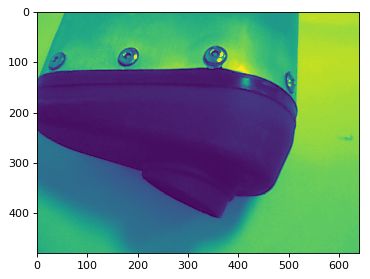

In [21]:
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 80

img1 = cv2.imread('./data/model2/model2_121.png', 0)
img2 = img1.copy()
plt.imshow(img1)

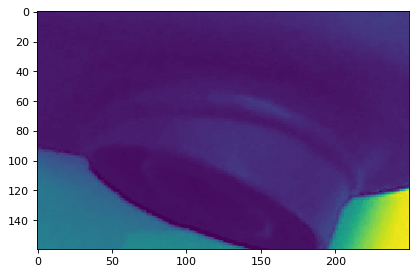

In [9]:
img_crop = img1[190:350,250:500]
plt.imshow(img_crop)

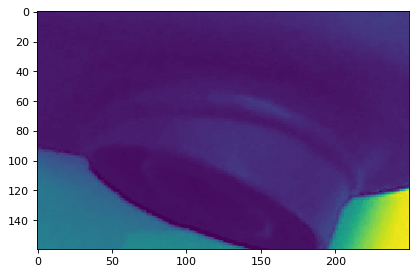

In [10]:
# Making this crop as a template

template = img_crop
w, h = template.shape[::-1]
plt.imshow(template)

In [11]:
# All the 6 methods for comparison in a list
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCOEFF']

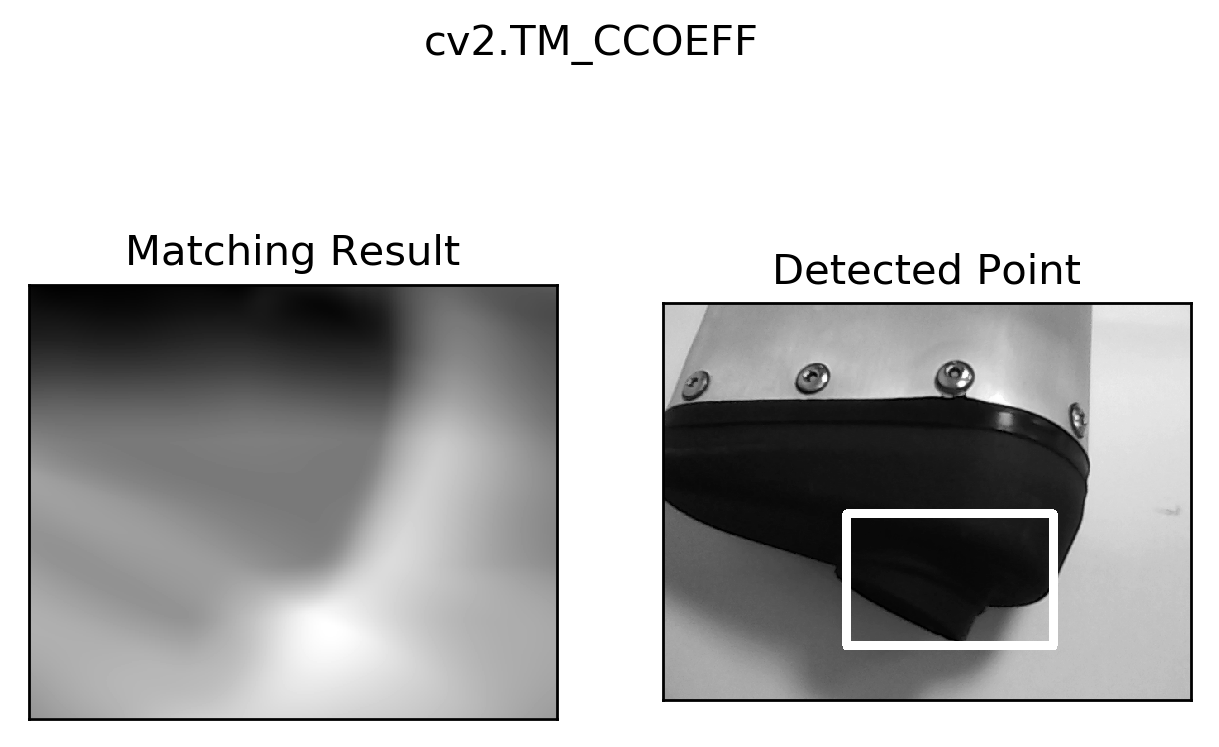

47792392.0


In [22]:
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 250

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 10)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    print(max_val)

In [ ]:
# TODO: opencv does not have any pattern matching for rotations. Figure out if this is true and also improve robustness by using ML based methods. 
# Template based methods sometimes poorly match the features with a wrong part of the input image. Therefore, we need stable set of images without any shadow in the background. 